<a href="https://colab.research.google.com/github/venu72561-chinnam/AI-ML-project/blob/main/polynomialregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/creditcard 2.csv')


In [3]:
X = df.drop(["Amount", "Class"], axis=1)
y = df["Amount"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
degree = 2
pipe = Pipeline([
    ("scaler", StandardScaler()),                         # scale original features
    ("poly",   PolynomialFeatures(degree=degree, include_bias=False)),
    ("lin",    LinearRegression())
])

In [10]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


In [11]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

In [12]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

Mean Squared Error: 530.0037263599457
Mean Absolute Error: 8.962672131958826
R² Score: 0.9899701033883338


In [13]:
poly_step = pipe.named_steps["poly"]
lin_step  = pipe.named_steps["lin"]

In [14]:
feature_names = poly_step.get_feature_names_out(input_features=X.columns)
coefs = lin_step.coef_

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs
})
coef_df["abs_coef"] = coef_df["coefficient"].abs()

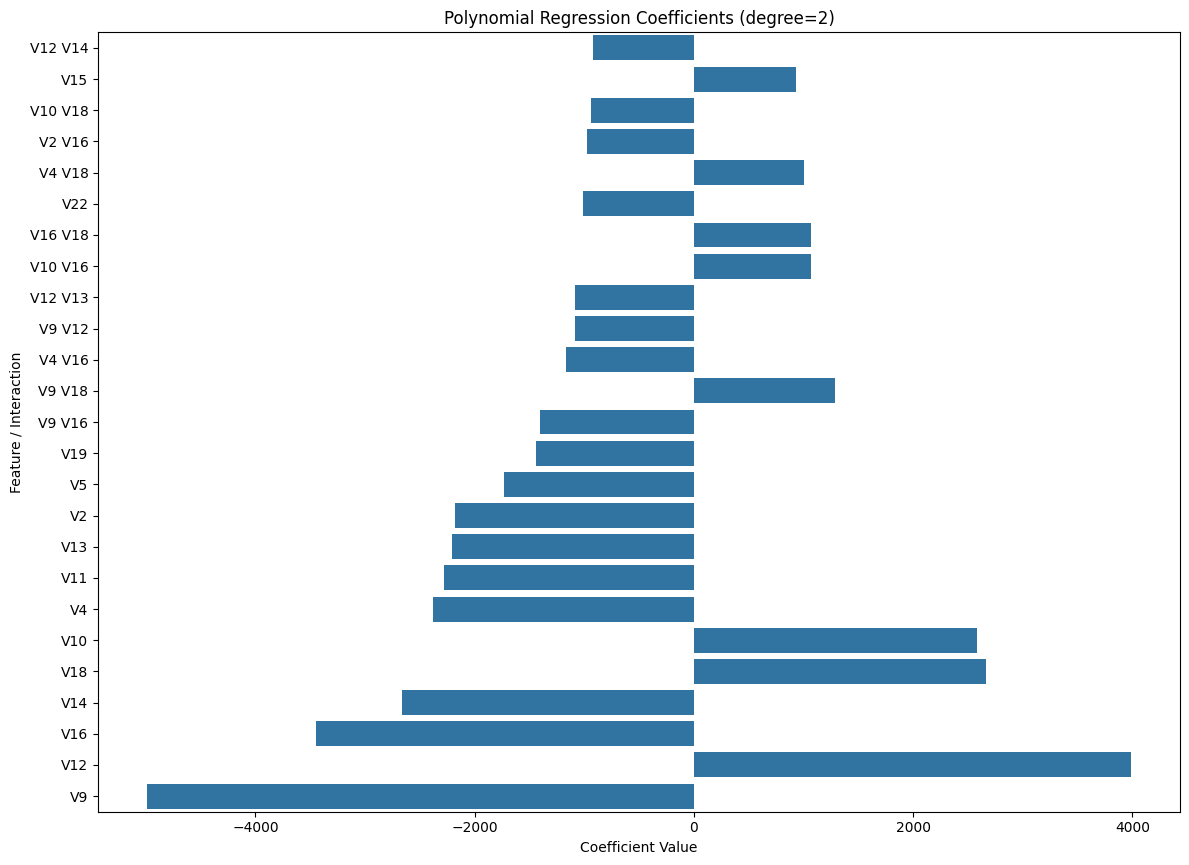

In [15]:
TOP_N = 25
coef_plot = coef_df.sort_values("abs_coef", ascending=True).tail(TOP_N)

plt.figure(figsize=(12, max(6, TOP_N * 0.35)))
sns.barplot(x="coefficient", y="feature", data=coef_plot, orient="h")
plt.title(f"Polynomial Regression Coefficients (degree={degree})")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature / Interaction")
plt.tight_layout()
plt.show()